# ЛАБОРАТОРНАЯ РАБОТА №3. АНАЛИЗ ИЗОБРАЖЕНИЙ

## 1) Взять любое изображение P1. Узнать размеры изображения.

In [1]:
from PIL import Image # из библиотеки PIL импортируем модуль Image

In [2]:
img = Image.open("p1.jpg") # с помощью функции open открываем изображение по веденному названию и создаем объект img класса Image

In [7]:
print(f'Размер изображения: {img.size[0]} x {img.size[1]} пикселей') 
# img.size[0] - ширина изображения; img.size[1] - высота изображения

Размер изображения: 638 x 638 пикселей


## 2) Создать цветную и чернобелую миниатюру на основе изображения P1. Размер миниатюры произвольный. Сохранить миниатюру в свою папку

In [8]:
from PIL import Image

In [10]:
img = Image.open("p1.jpg")

In [12]:
size = (128, 128)
img.thumbnail(size) # создаем из изображения миниатюру заданного размера size

In [13]:
img.show() # показать (открыть изображение) средством просмотра фотографий

In [14]:
img.save('p2_color.jpg', 'JPEG') # сохранение цветной миниатюры

In [22]:
img_bw = img.convert('L') #конвертирование миниатюры в чб 

In [24]:
img_bw.show() # показать (открыть изображение) средством просмотра фотографий

In [25]:
img_bw.save('p2_bw.jpg', 'JPEG') # сохранение чб миниатюры

## 3) Создать изображение P3 путем поворота на 180 и -75 градусов

In [63]:
from PIL import ImageDraw,Image

In [64]:
img = Image.open("p1.jpg")

In [65]:
box = [100, 100, 300, 300] # квадратная область (left, upper, right, lower)

In [66]:
imgCrop = img.crop(box) # выделение (обрезка) области заданной box

In [67]:
imgCropRotate = imgCrop.rotate(90) # поворот на 90 градусов против часов

In [68]:
img.paste(imgCropRotate,(box)) # вставка обрезанного повернутого изображения в то место откуда обрезалась исходная картиинка

In [69]:
box2 = (300, 100, 600, 400)

In [70]:
imgCrop = img.crop(box2) # выделение (обрезка) области заданной box

In [75]:
imgCropRotate = imgCrop.rotate(-125) # поворот по часовой

In [73]:
img.paste(imgCropRotate, (box2)) # вставка обрезанного повернутого изображения в то место откуда обрезалась исходная картиинка

In [76]:
draw = ImageDraw.Draw(img) # создаем объект, который работает с изображением img, рисует всё что угодно, что скажем

In [77]:
draw.rectangle(box, outline="red", width=4) # говорим этому объекту нарисуй прямоугольник с красной границей в той области откуда вырезали первый прямоугольник

In [78]:
draw.rectangle(box2, outline="red", width=4) # говорим этому объекту нарисуй прямоугольник с красной границей в той области откуда вырезали второй прямоугольник

In [79]:
img.show()

In [80]:
img.save('p3.jpg', 'JPEG') # сохранение картинки как p3.jpg

## 4) Для полутонового изображения P1 и его инвертированного изображения построить гистограммы. Сохранить гистограммы. Изменить яркость полутонового изображения P1, построить гистограмму получившегося изображения.

In [112]:
from PIL import Image,ImageOps    
import matplotlib.pyplot as plt
import numpy as np

In [82]:
img = Image.open("p1.jpg")
imgPoluton = img.convert('L') # конвертируем изображение в полутоновое

In [84]:
mas = np.array(imgPoluton) # изображение передылваем в массив numpy

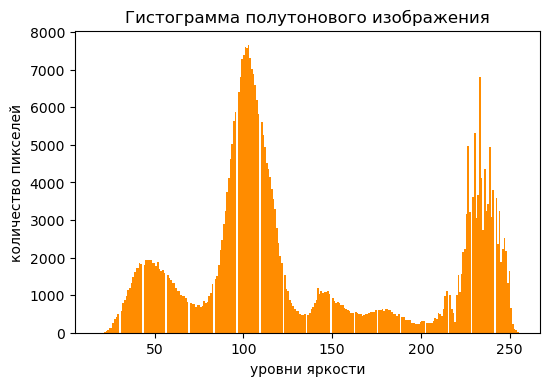

In [89]:
plt.figure(dpi=100)
plt.hist(mas.flatten(), 256, color='darkorange') #гистограмма
plt.title('Гистограмма полутонового изображения')
plt.ylabel('количество пикселей')
plt.xlabel('уровни яркости')
plt.savefig('saved_1.png')
plt.show()

In [92]:
imgPolutonInvert = ImageOps.invert(imgPoluton) # инвертированое

In [95]:
mas2 = np.array(imgPolutonInvert) # изображение передылваем в массив numpy

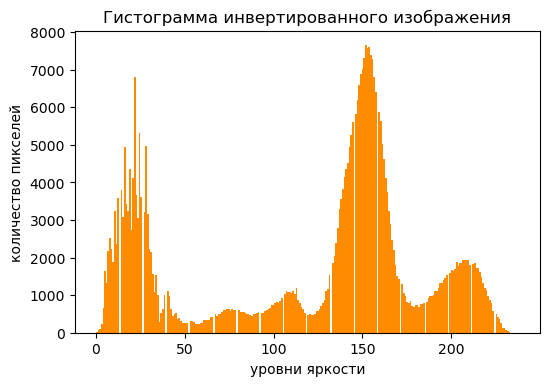

In [101]:
plt.figure(dpi=100)
plt.hist(mas2.flatten(), 256, color='darkorange') # гистограмма
plt.title('Гистограмма инвертированного изображения')
plt.ylabel('количество пикселей')
plt.xlabel('уровни яркости')
plt.savefig('saved_2.png')
plt.show()

In [109]:
mass = 150 - mas*0.5 # уровень яркости

In [105]:
im = Image.fromarray(uint8(mass)) # создаем изображение из набора (массива пикселей) яркостей всех точек 638 Х 638

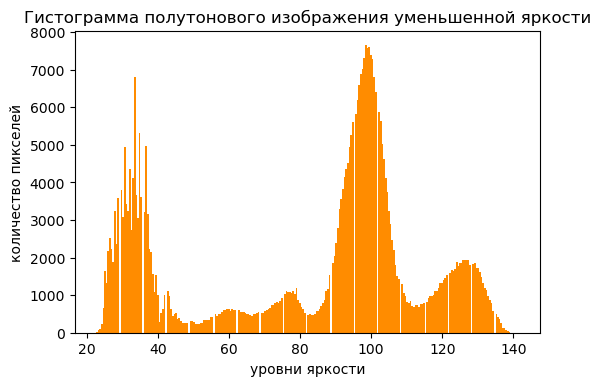

In [111]:
plt.figure(dpi=100)
plt.hist(mass.flatten(), 256, color='darkorange') # гистограмма Разбивка твоих данных на 256
plt.title('Гистограмма полутонового изображения уменьшенной яркости')
plt.ylabel('количество пикселей')
plt.xlabel('уровни яркости')
plt.savefig('saved_3.png')
plt.show()

## 5) Выровнять гистограмму изображения P1 любым способом. Сохранить исходное, модифицированное изображение и сравнить гистограммы.

In [113]:
from PIL import Image, ImageOps    
import matplotlib.pyplot as plt
import numpy as np

In [114]:
def histi(arr_image, i=256):
    imh, b = np.histogram(arr_image.flatten(), i, normed=True)
    cdf = imh.cumsum() # возвращает кумулятивную (накапливаемую) сумму элементов массив
    cdf = 255 * cdf / cdf[-1] # способ модификации изображения (каждый пиксель умножаем и делим), получили модифицированные значения уровнейний якростей пикселей
    mas_u = np.interp(arr_image.flatten(), b[:-1], cdf)
    return mas_u.reshape(arr_image.shape), cdf

In [116]:
img = Image.open("p1.jpg")

In [126]:
arr_image = np.array(img) # изображение передылваем в массив numpy

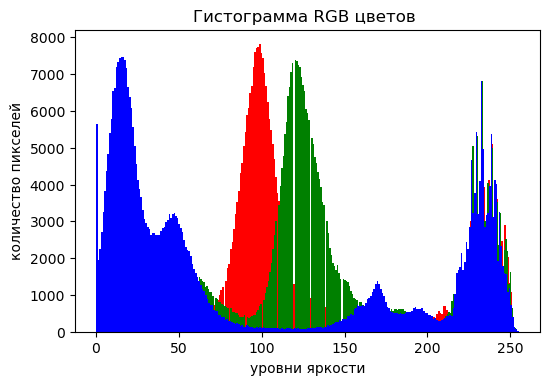

In [127]:
color = ['red', 'green', 'blue']
plt.figure(dpi=100)
for i in range(3):
    plt.hist(arr_image[:,:,i].flatten(), 256, color=color[i]) #гистограмма
plt.title('Гистограмма RGB цветов ')
plt.ylabel('количество пикселей')
plt.xlabel('уровни яркости')
plt.savefig('saved_51.png')
plt.show()

In [128]:
mas_u, cdf = histi(arr_image)

C:\Users\E920~1\AppData\Local\Temp/ipykernel_13348/3847300797.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imh, b = np.histogram(arr_image.flatten(), i, normed=True)


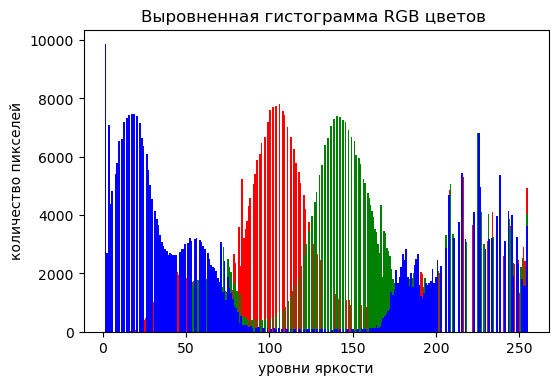

In [130]:
plt.figure(dpi=100)
for i in range(3):
    plt.hist(mas_u[:,:,i].flatten(), 256, color=color[i]) #гистограмма
plt.title('Выровненная гистограмма RGB цветов ')
plt.ylabel('количество пикселей')
plt.xlabel('уровни яркости')
plt.savefig('saved_52.png')
plt.show()

In [135]:
img_new = Image.fromarray(uint8(mas_u))

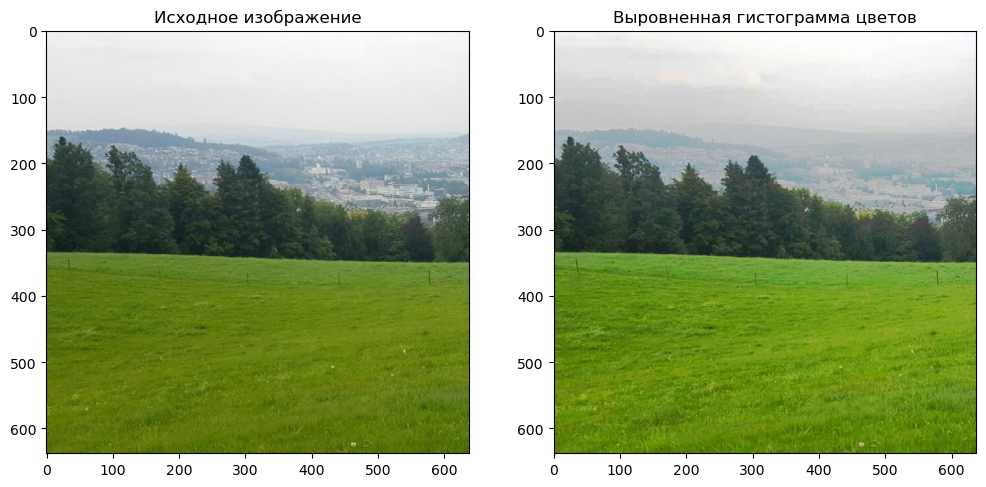

In [137]:
fig = plt.figure(dpi=100, figsize=(12, 7)) # cоздаем рабочую область (фигуру), на которой будут изображаться рисунки 

# cоздаем области для рисунков 
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

# отобразить картинки
ax_1.imshow(img)
ax_2.imshow(img_new)

# установить названия рисунков
ax_1.set(title='Исходное изображение')
ax_2.set(title='Выровненная гистограмма цветов')

plt.savefig('p5_histogram.jpg') # сохранить изображение

plt.show() # скрыть не нужную информацию

## 6) Наложить на изображение белый шум, построить гистограмму

In [138]:
from PIL import Image,ImageOps    
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage import io

In [139]:
img = Image.open("p1.jpg")
imgShum = random_noise(np.array(img), mode='gaussian', seed=None, clip=False) # Функция для добавления случайных шумов на картинку

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


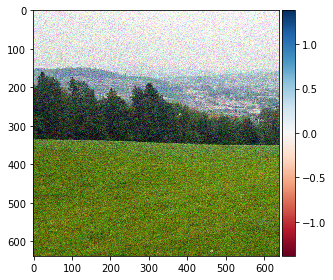

Lossy conversion from float64 to uint8. Range [-0.41395890821037007, 1.3822251584741678]. Convert image to uint8 prior to saving to suppress this warning.


In [140]:
io.imshow(imgShum)
io.show()
io.imsave('p6.jpg', imgShum)

In [ ]:
arr_image = np.array(imgShum)

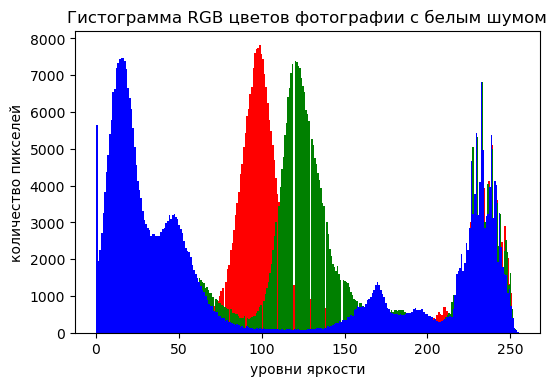

In [142]:
plt.figure(dpi=100)
for i in range(3):
    plt.hist(arr_image[:,:,i].flatten(), 256, color=color[i]) #гистограмма
plt.title('Гистограмма RGB цветов фотографии с белым шумом')
plt.ylabel('количество пикселей')
plt.xlabel('уровни яркости')
plt.savefig('p6_Shum.png')
plt.show()

## 7) Выполнить размытие изображения по Гауссу с произвольными значениями. Нарисовать изолинии для различных значений и сравнить их.

In [143]:
from PIL import Image    
import matplotlib.pyplot as plt
from scipy.ndimage import filters

In [150]:
img = np.array(Image.open("p1.jpg")) # создаем массив точек изображения с RGB цветом

In [151]:
img_2 = np.zeros(img.shape)

In [165]:
for i in range(3):
    img_2[:,:,i] = filters.gaussian_filter(img[:,:,i], 5) # 5 - радиус размытия по Гауссу
img_2 = uint8(img_2) # формат даных от 0 до 255 тип данных задаем "Целые числа в диапазоне от 0 по 255"
p = Image.fromarray(img_2) # создаем картинку из массива пикселей

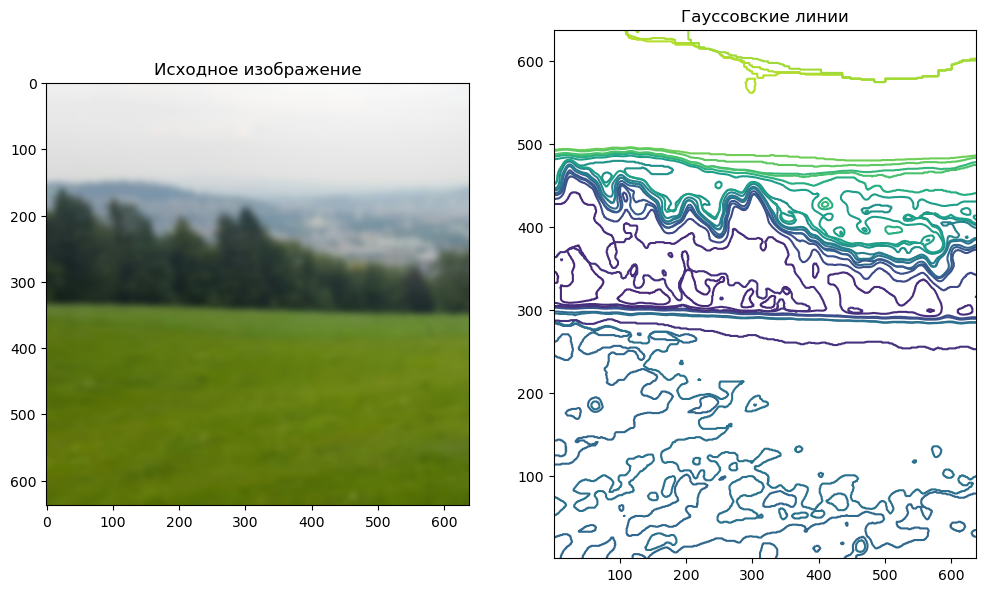

In [166]:
fig = plt.figure(dpi=100, figsize=(12, 7)) # cоздаем рабочую область (фигуру), на которой будут изображаться рисунки 

# cоздаем области для рисунков 
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

# отобразить картинки
ax_1.imshow(p)
for i in range(3):
    ax_2.contour(img_2[:,:,i], origin="image") # изолинии различных значений

# установить названия рисунков
ax_1.set(title='Исходное изображение')
ax_2.set(title='Гауссовские линии')

plt.savefig("p7_Gauss_R5.jpg")
plt.show()# скрываем ненужную инфу

In [169]:
for i in range(3):
    img_2[:,:,i] = filters.gaussian_filter(img[:,:,i], 1) # 1 - радиус размытия по Гауссу
img_2 = uint8(img_2) # формат даных от 0 до 255 тип данных задаем "Целые числа в диапазоне от 0 по 255"
p = Image.fromarray(img_2) # создаем картинку из массива пикселей

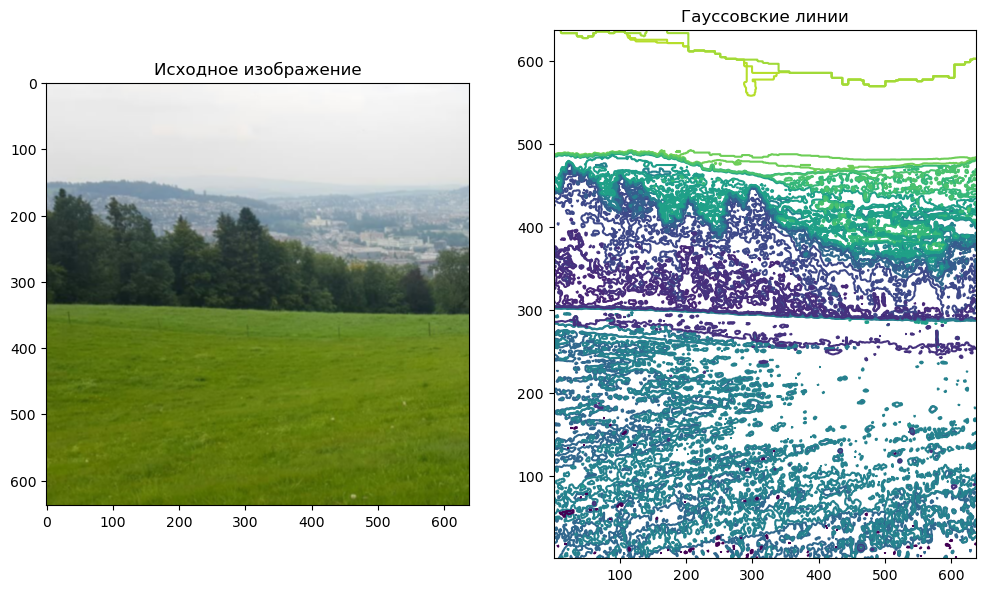

In [170]:
fig = plt.figure(dpi=100, figsize=(12, 7)) # cоздаем рабочую область (фигуру), на которой будут изображаться рисунки 

# cоздаем области для рисунков 
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

# отобразить картинки
ax_1.imshow(p)
for i in range(3):
    ax_2.contour(img_2[:,:,i], origin="image") # изолинии различных значений

# установить названия рисунков
ax_1.set(title='Исходное изображение')
ax_2.set(title='Гауссовские линии')

plt.savefig("p7_Gauss_R5.jpg")
plt.show()# скрываем ненужную инфу